In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [2]:
train_data = 'D:/MLwork/.venv/ML_LAB/Fruits Classification/train'
test_data = 'D:/MLwork/.venv/ML_LAB/Fruits Classification/test'
val_data = 'D:/MLwork/.venv/ML_LAB/Fruits Classification/valid'

In [3]:
image_count = len(list(train_data.glob('*/*.jpg')))
print(image_count)

AttributeError: 'str' object has no attribute 'glob'

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9700 files belonging to 5 classes.
Using 7760 files for training.


In [6]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 5 classes.
Using 20 files for validation.


In [7]:
class_names = train_ds.class_names
class_names

['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']

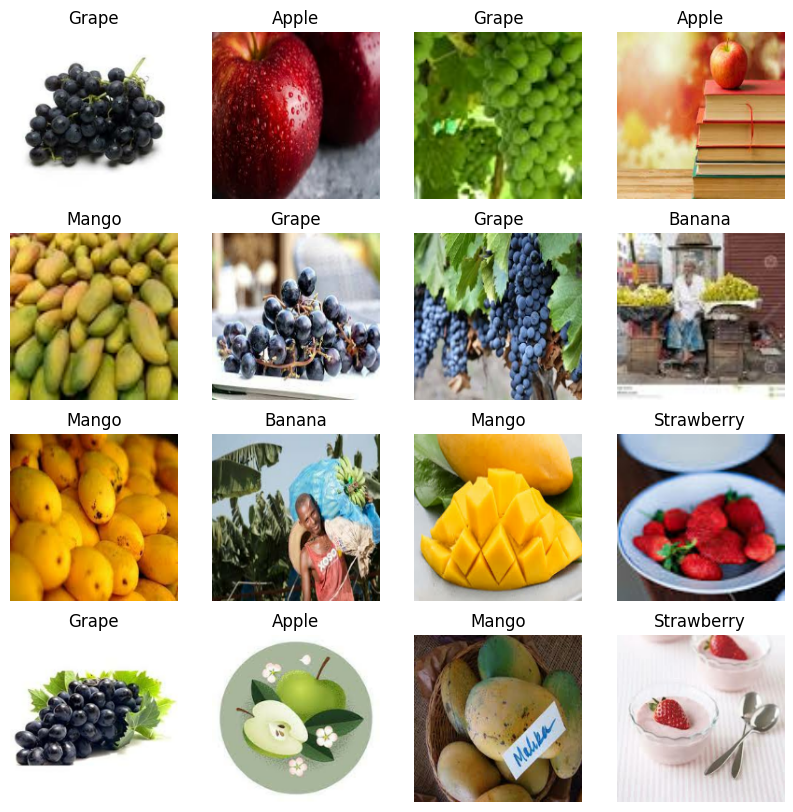

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [10]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [11]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [14]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [15]:
model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=20
)

Epoch 1/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 78s 313ms/step - accuracy: 0.3684 - loss: 1.4247 - val_accuracy: 0.4000 - val_loss: 1.2889
Epoch 2/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 103s 425ms/step - accuracy: 0.5608 - loss: 1.0693 - val_accuracy: 0.5000 - val_loss: 1.0896
Epoch 3/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 79s 324ms/step - accuracy: 0.6027 - loss: 0.9707 - val_accuracy: 0.6000 - val_loss: 1.0406
Epoch 4/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 78s 319ms/step - accuracy: 0.6607 - loss: 0.8470 - val_accuracy: 0.6000 - val_loss: 1.0272
Epoch 5/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 84s 345ms/step - accuracy: 0.7097 - loss: 0.7129 - val_accuracy: 0.6500 - val_loss: 0.9327
Epoch 6/20
206/243 ━━━━━━━━━━━━━━━━━━━━ 14s 388ms/step - accuracy: 0.7838 - loss: 0.5612

KeyboardInterrupt: 